# ELECCION DE MODELO
Se procede a determiar el modelo que nos entregue la presicion mas alta, usando el Prepro01 y Prepro02 que creamos con anterioridad.
Los modelos candidatos son:
- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier


Tambien procedimos a analizar la matriz de confuncion para la interpretacion de resultados.

In [5]:
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score as cv
from sklearn.model_selection import StratifiedKFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

## MODELO 01
Utilizando el Prepro01.csv

In [6]:
# Enlace al archivo CSV en GitHub
github_link = "https://raw.githubusercontent.com/Martinerramuspe/02-DATA_SCIENCIE/main/01-TELECOM_CHURN_PROJECT/02-PREPROCESAMIENTO/Prepro01.csv"

# Descargar el archivo CSV desde GitHub
response = requests.get(github_link)

# Leer el contenido del CSV
csv_data = StringIO(response.text)

# Crear un DataFrame con los datos
df = pd.read_csv(csv_data, encoding='utf-8')

In [7]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.622549,0.068627,0,1,0.531915,0.798736,0.600000,0.798760,0.487903,0.481132,0.487921,0.665428,0.413462,0.665289,0.478571,0.222222,0.478836,0.333333,0
1,0.519608,0.068627,0,1,0.553191,0.435195,0.723810,0.435124,0.480938,0.518868,0.481018,0.701487,0.528846,0.701653,0.742857,0.222222,0.743386,0.333333,0
2,0.666667,0.068627,0,0,0.000000,0.722515,0.638095,0.722521,0.208578,0.584906,0.208369,0.360223,0.538462,0.360331,0.635714,0.444444,0.634921,0.000000,0
3,0.362745,0.068627,1,0,0.000000,0.453109,0.628571,0.453099,0.307918,0.698113,0.308024,0.450558,0.701923,0.450413,0.485714,0.222222,0.486772,1.000000,0
4,0.573529,1.000000,1,0,0.000000,0.652266,0.485714,0.652273,0.572947,0.500000,0.572908,0.513755,0.673077,0.514050,0.214286,0.555556,0.214286,0.000000,0


### MODELO

In [8]:
# Definimo variables predictoras y variable objetivo.
X=df.drop('Churn',axis=1)
y=df.Churn

In [9]:
# Generamos el split para empaquetar lo train y test.
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=39)

In [10]:
# Inicializar y entrenar los modelos
logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()

In [11]:
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Realizar predicciones en el conjunto de prueba
logistic_predictions = logistic_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

In [13]:
# se puede ver un desbalance importante, se puede apreciar los porcentaje en la etapa anterior de exploracion de datos.
y_test.value_counts()

0    492
1     69
Name: Churn, dtype: int64

In [14]:
# Determinamos predicciones para cada modelo
y_pred_logistic_model=logistic_model.predict(X_test)
y_pred_forest_model=forest_model.predict(X_test)
y_pred_tree_Model=tree_model.predict(X_test)

In [15]:
# Aplicamos CV con la herramienta Stratified
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
logistic_cv_scores = cv(logistic_model, X_train, y_train, cv=skf)
tree_cv_scores = cv(tree_model, X_train, y_train, cv=skf)
forest_cv_scores = cv(forest_model, X_train, y_train, cv=skf)

In [16]:
# Imprimir los resultados de la validación cruzada para cada modelo

print("Resultados de validación Stratified - Regresión Logística:")
print(logistic_cv_scores)
print(f"Precisión media: {logistic_cv_scores.mean()}\n")

print("Resultados de validación Stratified - Árbol de Clasificación:")
print(tree_cv_scores)
print(f"Precisión media: {tree_cv_scores.mean()}\n")

print("Resultados de validación Stratified - Random Forest:")
print(forest_cv_scores)
print(f"Precisión media: {forest_cv_scores.mean()}\n")

Resultados de validación Stratified - Regresión Logística:
[0.89614243 0.90504451 0.90178571 0.90178571 0.88392857]
Precisión media: 0.8977373887240356

Resultados de validación Stratified - Árbol de Clasificación:
[0.90207715 0.92878338 0.9077381  0.92857143 0.94047619]
Precisión media: 0.9215292496820687

Resultados de validación Stratified - Random Forest:
[0.95252226 0.96439169 0.94642857 0.95833333 0.95833333]
Precisión media: 0.956001836936555



### MATRIZ

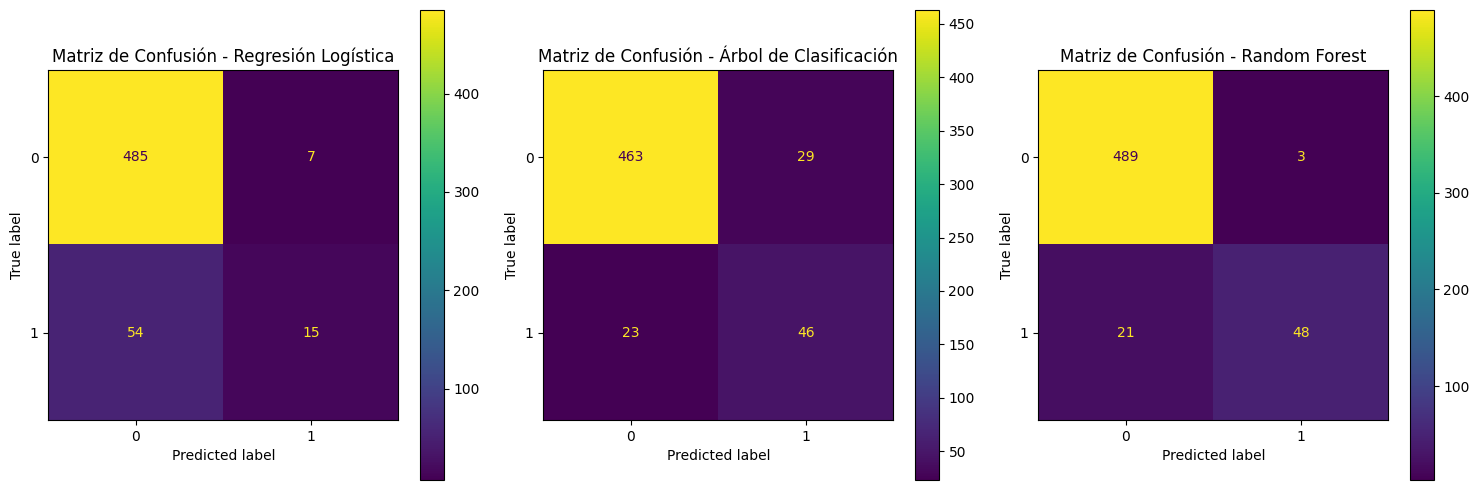

In [17]:
# Interpretamos balance de modelos categoricos con matriz de confucion
# Creamos grafica en paralelo
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Matriz de confusión para el modelo logístico.
cm_logistic = confusion_matrix(y_test, y_pred_logistic_model, labels=logistic_model.classes_)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=logistic_model.classes_)
disp_logistic.plot(ax=axs[0])
axs[0].set_title('Matriz de Confusión - Regresión Logística')

# Matriz de confusión para el modelo de árbol.
cm_tree = confusion_matrix(y_test, y_pred_tree_Model, labels=tree_model.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_model.classes_)
disp_tree.plot(ax=axs[1])
axs[1].set_title('Matriz de Confusión - Árbol de Clasificación')

# Matriz de confusión para el modelo de bosque aleatorio.
cm_forest = confusion_matrix(y_test, y_pred_forest_model, labels=forest_model.classes_)
disp_forest = ConfusionMatrixDisplay(confusion_matrix=cm_forest, display_labels=forest_model.classes_)
disp_forest.plot(ax=axs[2])
axs[2].set_title('Matriz de Confusión - Random Forest')

# Ajustar el diseño
plt.tight_layout()
plt.show()





# Podemos ver que la  matriz ganadora es  random forest, ya que tiene un total de aciertos de 489 + 47

### SELECCION_CARACTERISTICAS

In [18]:
# Recurrimos al for para, recorrer del 1 a 13 viariables del dataframe, y de elegir las mejores combinaciones de cada una.
best_feature_sets = [] # Creamos lista vcia.
X_train, X_test, y_train, y_test = train_test_split(X, y)# Split

for num_features in range(1, 14):# Rango de variables.
    # SFS
    sfs = SFS(forest_model, k_features=num_features, forward=False) # de atras para adelante fordward=false
    sfs.fit(X_train, y_train)# Fit
    selected_feature_names = sfs.k_feature_names_# Nombre de las varibles que combinados dan la mejor presicion
    best_feature_sets.append(selected_feature_names) # Rellenamos lista vacia con los nombres
    print(f"Mejores {num_features} características seleccionadas: {selected_feature_names}")

Mejores 1 características seleccionadas: ('International plan',)
Mejores 2 características seleccionadas: ('International plan', 'Total intl calls')
Mejores 3 características seleccionadas: ('International plan', 'Total intl calls', 'Total intl charge')
Mejores 4 características seleccionadas: ('International plan', 'Total eve minutes', 'Total intl calls', 'Total intl charge')
Mejores 5 características seleccionadas: ('International plan', 'Number vmail messages', 'Total day minutes', 'Total intl minutes', 'Total intl calls')
Mejores 6 características seleccionadas: ('International plan', 'Voice mail plan', 'Total day minutes', 'Total eve charge', 'Total intl calls', 'Total intl charge')
Mejores 7 características seleccionadas: ('International plan', 'Number vmail messages', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total intl calls', 'Total intl charge')
Mejores 8 características seleccionadas: ('International plan', 'Voice mail plan', 'Number vmail messages', 'Tot

In [19]:
# Con la lista de best_feature_sets ya definida anteriormente, avanzamos con el cross usando StratifiedKFold
for feature_set in best_feature_sets:
    # Recorremos las variables de X_train
    X_selected = X_train[list(feature_set)]
    # Aplicamos modelo
    forest_model.fit(X_selected, y_train)

    # prediccion en entrenamiento
    y_pred_train = forest_model.predict(X_selected)

    # Accuracy en entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # recorremos las variables de X_test
    X_test_selected = X_test[list(feature_set)]

    # rredicciones  conjunto de prueba
    y_pred_test = forest_model.predict(X_test_selected)


    # Croos con StratifiedKFold
    skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)# Aplicamos balance de categorias
    forest_cv_scores = cv(forest_model, X_train, y_train, cv=skf) # Cross validation
    precision_stratified = forest_cv_scores.mean()
    print(f"Características: {feature_set}")
    print(f"Presicion Stratified:{precision_stratified:.6f}")

Características: ('International plan',)
Presicion Stratified:0.955410
Características: ('International plan', 'Total intl calls')
Presicion Stratified:0.955410
Características: ('International plan', 'Total intl calls', 'Total intl charge')
Presicion Stratified:0.956597
Características: ('International plan', 'Total eve minutes', 'Total intl calls', 'Total intl charge')
Presicion Stratified:0.956601
Características: ('International plan', 'Number vmail messages', 'Total day minutes', 'Total intl minutes', 'Total intl calls')
Presicion Stratified:0.956595
Características: ('International plan', 'Voice mail plan', 'Total day minutes', 'Total eve charge', 'Total intl calls', 'Total intl charge')
Presicion Stratified:0.957786
Características: ('International plan', 'Number vmail messages', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total intl calls', 'Total intl charge')
Presicion Stratified:0.958379
Características: ('International plan', 'Voice mail plan', 'Number vma

**El grupo con la mejor presicion, estan definidas por :** 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes', 'Total night charge', 'Total intl minutes', 'Total intl calls'

**Presicion Stratified:**0.953024

CONCLUSION: Podriamos tomar  menos caracteristicas, para ahorra recursos computacionales, ya que no hay mucha dispersion entre los resultados, pero en este proyecto queremos lo mejor de lo mejor.


## MODELO 02
Utilizando el Prepro02.csv
Por el problema de los dummys con los modelos, tenemos que aplicar el preprocesamiento en esta etapa nuevamente.

### MODELO

In [33]:
# Definimo variables predictoras y variable objetivo.
X=df.drop('Churn',axis=1)
y=df.Churn

In [34]:
# Generamos el split para empaquetar lo train y test.
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=39)

In [35]:
logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'NM'

In [25]:
X_train_encoded = pd.get_dummies(X_train)
logistic_model.fit(X_train_encoded, y_train)
tree_model.fit(X_train_encoded, y_train)
forest_model.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [29]:
# Realizar predicciones en el conjunto de prueba
logistic_predictions = logistic_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- State
Feature names seen at fit time, yet now missing:
- State_AK
- State_AL
- State_AR
- State_AZ
- State_CA
- ...


### MATRIZ

### SELECCION_CARACTERISTICAS

CON